In [1]:
import numpy as np
from scipy.special import gamma
from numpy import linalg
import matplotlib.pyplot as plt
import time

# harmonic oscillator

In [64]:
omega = 1
m = 1
alpha = 1

T = 0.5*np.pi/omega
Nscale = 0
L = 30
M = 16000
N = int(10*T)
x = np.linspace(-L, L, M + 1)
dx = 2*L/M
dt = T/(N + 1)
#---------------------------------------------------------
#time_seconds = np.log(N) * M**3 * 1.8e-10
time_seconds = N * M**2 * 6e-9
hours = int(time_seconds // 3600)
minutes = int((time_seconds % 3600) // 60)
seconds = int(time_seconds % 60)
print(f'(T='+f'{T}'+', L='+f'{L}'+', M='+f'{M}'+', N='+f'{N}'+', (Nscale='+f'{Nscale}'+'))')
print(f"Estimated time: {hours}h {minutes}min {seconds}s")
coK = dx * (m/(2*np.pi*1j*dt))**(1/2)
coK_power = coK**(N+1)
print(f'coeff of K = {coK}')
print(f'coeff of K^(N+1) = {coK_power}')
print(f'|coeff of K^(N+1)|^2 = {(coK_power.real)**2 + (coK_power.imag)**2}')

(T=1.5707963267948966, L=30, M=16000, N=15, (Nscale=0))
Estimated time: 0h 0min 23s
coeff of K = (0.003376186185589148-0.003376186185589148j)
coeff of K^(N+1) = (7.295619606198416e-38+0j)
|coeff of K^(N+1)|^2 = 5.322606543834672e-75


In [68]:
print(f'(T='+f'{T}'+', L='+f'{L}'+', M='+f'{M}'+', N='+f'{N}'+', (Nscale='+f'{Nscale}'+'))')
ta_start = time.time()
psi_0 = (m*omega / np.pi)**(1/4) * np.exp(- m*omega/2 * (x - np.sqrt(2/(m*omega)) * alpha.real)**2 + 1j * np.sqrt(2*m*omega) * alpha.imag * x - 1j * alpha.real * alpha.imag)

# Assuming x is a NumPy array
x = np.asarray(x)
X_i, X_j = np.meshgrid(x, x, indexing='ij')
weight1 = 1
weight2 = 1
K = (m / (2 * np.pi * 1j * dt))**0.5 * (
    np.exp(1j * (m / 2 * (X_i - X_j)**2 / dt)) * (weight1*np.exp((- 1j * dt * m*omega**2/2 * X_i**2)) + weight2*np.exp((- 1j * dt * m*omega**2/2 * X_j**2)))/(weight1+weight2)
)
#print(f'condition(K) = {np.linalg.cond(K)}')

run_time_start = time.time()
print(f'ta = {run_time_start - ta_start:.3f}s')
psi_final = psi_0
for i in range(N+1):
    psi_final = dx * K @ psi_final
run_time_end = time.time()

#print(f't/complexity = {(run_time_end-run_time_start)/(np.log(N) * M**3)}')
print(f't/complexity = {(run_time_end-run_time_start)/(N * M**2)}')
np.save('data/(T='+f'{T}'+', L='+f'{L}'+', M='+f'{M}'+', N='+f'{N}'+', (Nscale='+f'{Nscale}'+')) - psi_final.npy', psi_final)

(T=1.5707963267948966, L=30, M=16000, N=15, (Nscale=0))
ta = 72.034s
t/complexity = 7.851185835897923e-09


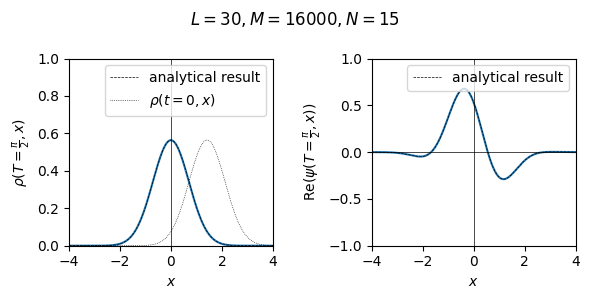

A = 0.563660 * 10^(0)
1
A_analytically = 0.9999999999999969


In [79]:
load = 0
if load == 0:
    psi_final = np.load('data/(T='+f'{T}'+', L='+f'{L}'+', M='+f'{M}'+', N='+f'{N}'+', (Nscale='+f'{Nscale}'+')) - psi_final.npy')
else: # load == 1
    psi_final = np.load('data/(T=0.5, L=400, M=12000, N=5, (Nscale=0)) - psi_final.npy')
    T=0.5
    L=400
    M=12000
    N=5

    x = np.linspace(-L, L, M+1)
    dx = 2*L/M

rho_final = (psi_final.real)**2 + (psi_final.imag)**2
xmax = 4
xmin = -4
rho_renormalized = []
for i in range(len(psi_final)):
    if x[i] + dx > xmin and x[i] - dx < xmax:
        rho_renormalized.append(rho_final[i])
    else:
        rho_renormalized.append(0)
rho_renormalized = np.array(rho_renormalized)
A = 1 #sum(rho_renormalized) * dx
rho_renormalized = rho_renormalized / A
#---------------------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(6,3))
fig.suptitle('$L = '+f'{L}'+', M = '+f'{M}'+', N = '+f'{N}$')
ax0 = axes[0]
ax0.plot(x, rho_renormalized)
m=1
omega=1
alpha_t = alpha * np.exp(- 1j * omega * T)
psi_analytically = (m*omega / np.pi)**(1/4) * np.exp(
    - m*omega/2 * (x - np.sqrt(2/(m*omega)) * alpha_t.real)**2 + 1j * np.sqrt(2*m*omega) * alpha_t.imag * x + 1j * (- omega*T/2 - alpha_t.real * alpha_t.imag)
)
rho_analytically = (psi_analytically.real)**2 + (psi_analytically.imag)**2
#rho_analytically = np.sqrt(m*omega/np.pi) * np.exp(-m*omega*(x - np.sqrt(2/(m*omega)) * alpha_t.real)**2)
A_analytically = sum(rho_analytically) * dx
ax0.plot(x, rho_analytically, linestyle='--', linewidth=0.5, color='black', label='analytical result')
rho_0 = np.sqrt(m*omega/np.pi) * np.exp(-m*omega*(x - np.sqrt(2/(m*omega)) * alpha.real)**2)
ax0.plot(x, rho_0, linestyle=':', linewidth=0.5, color='black', label='$\\rho(t = 0, x)$')
ax0.axvline(x=0, linestyle='-', linewidth=0.5, color='black')
ax0.set_xlabel('$x$')
#ax0.set_ylabel('$\\rho(T = '+f'{T}'+', x)$')
ax0.set_ylabel('$\\rho(T = \\frac{\\pi}{2}, x)$')
ax0.set_xlim(xmin, xmax)
ax0.set_ylim(0, 1)
ax0.legend()
#-----------------------------------------------------------------------------------------------------------------------
ax1 =axes[1]
ax1.plot(x, psi_final.real)
ax1.plot(x, psi_analytically.real, linestyle='--', linewidth=0.5, color='black', label='analytical result')
#ax1.plot(x, psi_0.real, linestyle=':', linewidth=0.5, color='black', label='$\\mathrm{Re}(\\psi(t = 0, x))$')
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(-1, 1)
ax1.axvline(x=0, linestyle='-', linewidth=0.5, color='black')
ax1.axhline(y=0, linestyle='-', linewidth=0.5, color='black')
ax1.set_xlabel('$x$')
#ax1.set_ylabel('$\\mathrm{Re}(\\rho(T = '+f'{T}'+', x))$')
ax1.set_ylabel('$\\mathrm{Re}(\\psi(T = \\frac{\\pi}{2}, x))$')
ax1.legend(loc='upper right')

plt.tight_layout()
plt.savefig('numerical path integral (normalized) of a harmonic oscillator with initial state as a coherent state and T='+f'{T}'+' (L='+f'{L}'+', M='+f'{M}'+', N='+f'{N}'+').pdf', format='pdf')
plt.show()

Ascale = int(np.log(rho_final[int(M/2)])/np.log(10))
print(f'A = {(rho_final[int(M/2)] / 10**Ascale):1f} * 10^({Ascale})')
print(A)
print(f'A_analytically = {A_analytically}')

# completeness relation for the basis $\{\ket{n}\}$

$$
\sum_{n = 0}^\infty \braket{y | n} \braket{n | x} \overset{?}{=} \delta(y - x)
$$

In [ ]:
def my_Hermite(n, x):
    coeffs = [0]*n + [1]  # Coefficients: only the n-th term is 1
    Hn = np.polynomial.hermite.Hermite(coeffs)
    return Hn(x)
def psi(n, x):
    return 1/(np.pi**(1/4) * np.sqrt(2**n * gamma(n+1))) * my_Hermite(n, x) * np.exp(- x**2/2)

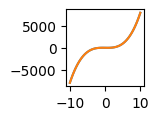

In [3]:
x = np.linspace(-10, 10, 100)
y = my_Hermite(3, x)
fig, ax = plt.subplots(figsize=(1,1))
ax.plot(x, y)
ax.plot(x, 8*x**3-12*x)
plt.show()
#print(y)

C:\Users\siyang\AppData\Local\Temp\ipykernel_11416\1138387935.py:6: RuntimeWarning: overflow encountered in scalar multiply
  return 1/(np.pi**(1/4) * np.sqrt(2**n * gamma(n+1))) * my_Hermite(n, x) * np.exp(- x**2/2)


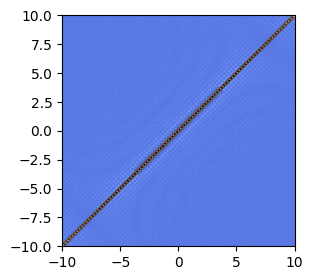

In [34]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
z = 0*X*Y
for i in range(200):
    z += psi(i, X) * psi(i, Y)
levels = np.arange(np.min(z)-0.1, np.max(z)+0.1, 0.1)

fig, ax = plt.subplots(figsize=(3, 3))
contour = ax.contourf(X, Y, z, levels, cmap='coolwarm')
levels_contourline = np.arange(np.min(z)-1, np.max(z)+1, 1)
ax.contour(X, Y, z, levels=levels_contourline,
    colors="black",
    linestyles="-",
    linewidths=1,
    alpha=0.3,)
plt.show()

1.026366115899677


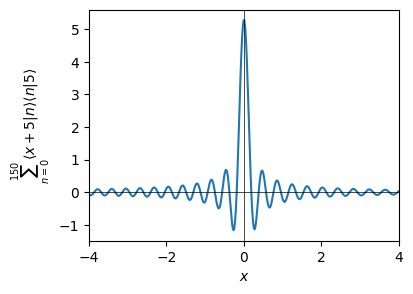

In [85]:
xmax=52
x = np.linspace(-xmax, xmax, int(xmax*100))
x0 = 5
N=150
y = 0
for i in range(N+1):
    y+= psi(i, x+x0) * psi(i, x0)

normalization = 0
dx = x[1] - x[0]
for i in range(len(y)):
    normalization+= dx * y[i]
print(normalization)

fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(x, y)
ax.set_xlim(-4, 4)
#ax.set_ylim(-2, int(max(y)+1))
ax.axhline(y=0, linestyle='-', linewidth=0.5, color='black')
ax.axvline(x=0, linestyle='-', linewidth=0.5, color='black')
ax.set_xlabel('$x$')
ax.set_ylabel('$\\sum_{n=0}^{'+f'{N}'+'} \\langle x + '+f'{x0}'+' | n \\rangle \\langle n |'+f'{x0}'+'\\rangle$')
plt.show()

## more

In [34]:
d = 100000000

def my_Hermite(n, x):
    coeffs = [0]*n + [1]  # Coefficients: only the n-th term is 1
    Hn = np.polynomial.hermite.Hermite(coeffs)
    return Hn(x)
def psi(n, x):
    return (d/np.pi)**(1/4) * 1/np.sqrt(2**n * gamma(n+1)) * my_Hermite(n, np.sqrt(d)*x) * np.exp(- d * x**2/2)

75.11255444649424
0.0188279252755386


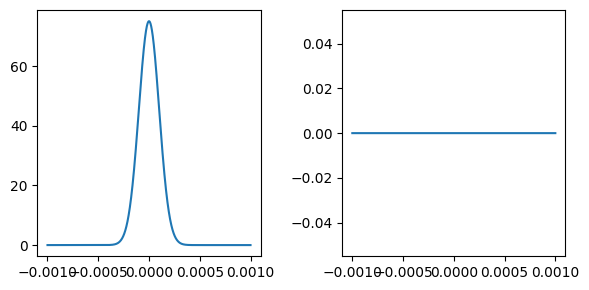

In [45]:
xmax = 10/np.sqrt(d)
n = 0
x = np.linspace(-xmax, xmax, int(xmax*d))
fig, axes = plt.subplots(1,2,figsize=(6,3))
ax0=axes[0]
ax0.plot(x, psi(n, x).real)
ax1=axes[1]
ax1.plot(x, psi(n, x).imag)
plt.tight_layout()
print((d/np.pi)**(1/4))
print(sum(psi(n, x))*(x[1]-x[0]))
plt.show()